In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')  
sns.set_theme(style="whitegrid")  

## Data Exploration

In [53]:
df = pd.read_csv("../build_dataset/output_csv/bloomberg_data.csv")

In [54]:
def remove_max_target(df):
    lower = df['Offer To 1st Close'].min()
    upper = df['Offer To 1st Close'].max()
    df = df[(df['Offer To 1st Close'] > lower) & (df['Offer To 1st Close'] < upper)].reset_index(drop=True)
    return df

df = remove_max_target(df)

### Dataset Information

In [55]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Issuer Ticker                5610 non-null   object 
 1   Issuer Name                  5610 non-null   object 
 2   Offer Size (M)               5610 non-null   float64
 3   Sales - 1 Yr Growth          3354 non-null   float64
 4   Profit Margin                3569 non-null   float64
 5   Return on Assets             4595 non-null   float64
 6   Shares Outstanding (M)       5610 non-null   float64
 7   Offer Price                  5610 non-null   float64
 8   Offer To 1st Close           5610 non-null   float64
 9   Market Cap at Offer (M)      5610 non-null   float64
 10  Trade Date (US)              5323 non-null   object 
 11  cusip                        5609 non-null   object 
 12  Cash Flow per Share          4359 non-null   float64
 13  Instit Owner (Shar

### Describe

In [56]:
df_description = df.describe()
df_description

,Offer Size (M),Sales - 1 Yr Growth,Profit Margin,Return on Assets,Shares Outstanding (M),Offer Price,Offer To 1st Close,Market Cap at Offer (M),Cash Flow per Share,Instit Owner (Shares Held),Instit Owner (% Shares Out),Fed Rate,CPI,Consumer Confidence,Unemployment Rate
count,5610.000000,3354.000000,3569.000000,4595.000000,5610.000000,5610.000000,5610.000000,5610.000000,4359.000000,3.508000e+03,3.492000e+03,5323.000000,5316.000000,5305.000000,5316.000000
mean,268.081008,349.449846,-2080.345777,-61.713833,42.800872,27.652437,120.806655,684.289640,-307.549430,5.204029e+07,4.380180e+01,1.685994,240.260805,84.292083,5.642701
std,636.322502,9432.917561,22762.619879,1659.517402,159.920397,427.250512,2397.415592,2645.911732,12271.225870,1.761518e+08,4.006138e+01,2.043206,36.591785,11.529738,1.739912
min,0.000000,-1025.400000,-562285.000000,-69151.100000,0.000000,0.001000,-75.000000,0.000000,-566821.000000,1.000000e+00,8.290000e-07,0.049000,179.300000,50.000000,3.400000
25%,63.047500,-6.600000,-71.800000,-34.500000,9.189687,10.000000,0.000000,70.896850,-0.600000,1.257500e+06,7.836492e+00,0.090000,207.200000,76.100000,4.300000
50%,140.000000,7.100000,-6.400000,-2.900000,22.126550,12.000000,1.500000,237.250000,-0.019072,7.760000e+06,2.910935e+01,0.649677,239.191000,84.600000,5.400000
75%,281.750000,23.300000,6.800000,2.400000,38.268650,18.000000,16.237500,518.054750,1.400000,4.362500e+07,8.014298e+01,2.619677,270.341000,93.500000,6.300000
max,19650.400000,443745.000000,15853.300000,47045.400000,9022.560000,27000.000000,89900.000000,81247.200000,23789.100000,5.000000e+09,1.930450e+02,6.544516,325.659000,112.000000,14.800000


### Initial Cleaning Based on Describe

In [57]:
df = df[df['Offer Size (M)'] > 0]
df = df[~((df['Offer To 1st Close'] < 0) & (df['Offer To 1st Close'].abs() >= df['Offer Price']))]
df.to_csv('../build_dataset/output_csv/bloomberg_data.csv', index=False)

### Count Duplicates

In [58]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


### Count Unique

In [59]:
countunique = pd.DataFrame(df.nunique(), columns=['Count'])
countunique

,Count
Issuer Ticker,5314
Issuer Name,5293
Offer Size (M),3092
Sales - 1 Yr Growth,1242
Profit Margin,1668
Return on Assets,1302
Shares Outstanding (M),3695
Offer Price,262
Offer To 1st Close,2364
Market Cap at Offer (M),3736


### Missing Values

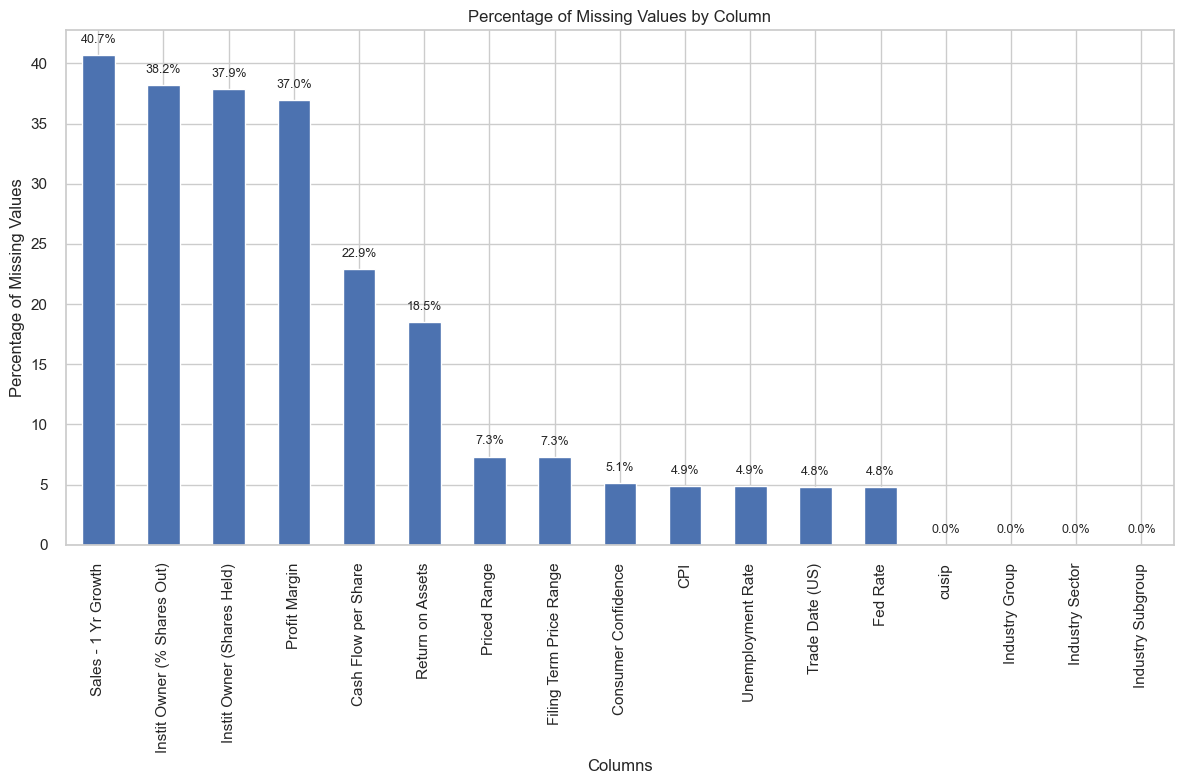

In [60]:
def missing_values_plot(df):
    # Missing values analysis
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentages
    }).sort_values('Percentage', ascending=False)

    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    plt.figure(figsize=(12, 8))
    ax = missing_df['Percentage'].plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=90)
    
    for i, v in enumerate(missing_df['Percentage']):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

    return missing_df
    

missing_df = missing_values_plot(df)

In [61]:
missing_df

,Missing Values,Percentage
Sales - 1 Yr Growth,2165,40.710794
Instit Owner (% Shares Out),2032,38.209853
Instit Owner (Shares Held),2016,37.908988
Profit Margin,1967,36.987589
Cash Flow per Share,1218,22.903347
Return on Assets,985,18.522001
Priced Range,390,7.333584
Filing Term Price Range,386,7.258368
Consumer Confidence,271,5.095901
CPI,261,4.907860


### Numerical Outliers

In [62]:
def numerical_outlier_analysis(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_data = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        if len(outliers) > 0:
            outlier_data.append({
                'Column': col,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers': (len(outliers)/len(df))*100,
                'Lower Bound': Q1 - 1.5 * IQR,
                'Upper Bound': Q3 + 1.5 * IQR
            })
    
    outlier_df = pd.DataFrame(outlier_data)
    if not outlier_df.empty:
        display(outlier_df)

numerical_outlier_analysis(df)

,Column,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
0,Offer Size (M),457,8.593456,-2.587376e+02,6.152426e+02
1,Sales - 1 Yr Growth,439,8.254983,-4.935000e+01,6.625000e+01
2,Profit Margin,583,10.962768,-1.567500e+02,1.060500e+02
3,Return on Assets,433,8.142159,-7.765000e+01,5.075000e+01
4,Shares Outstanding (M),537,10.097781,-3.468149e+01,8.267661e+01
5,Offer Price,184,3.459947,-2.000000e+00,3.000000e+01
6,Offer To 1st Close,538,10.116585,-2.603409e+01,4.339015e+01
7,Market Cap at Offer (M),581,10.925160,-6.098194e+02,1.222868e+03
8,Cash Flow per Share,649,12.203836,-3.500000e+00,4.500000e+00
9,Instit Owner (Shares Held),387,7.277172,-6.605000e+07,1.137100e+08


### Distribution of IPO Offer Prices

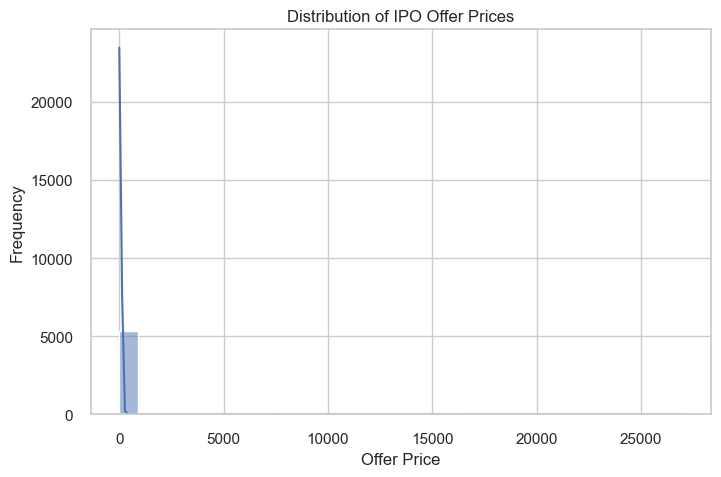

In [63]:
def offer_price_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Offer Price'].dropna(), bins=30, kde=True)
    plt.xlabel('Offer Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of IPO Offer Prices')
    plt.show()

offer_price_distribution(df)

### Distribution of Market Capitalization at Offer

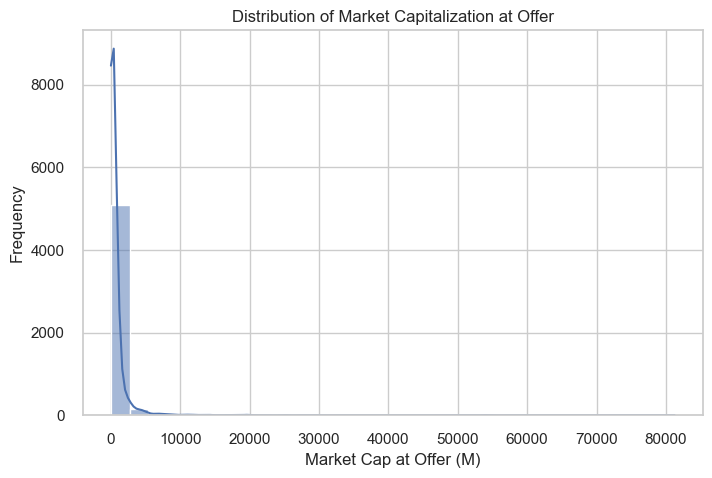

In [64]:
def market_cap_at_offer_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Market Cap at Offer (M)'].dropna(), bins=30, kde=True)
    plt.xlabel('Market Cap at Offer (M)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Market Capitalization at Offer')
    plt.show()

market_cap_at_offer_distribution(df)

### Number of IPOs over time

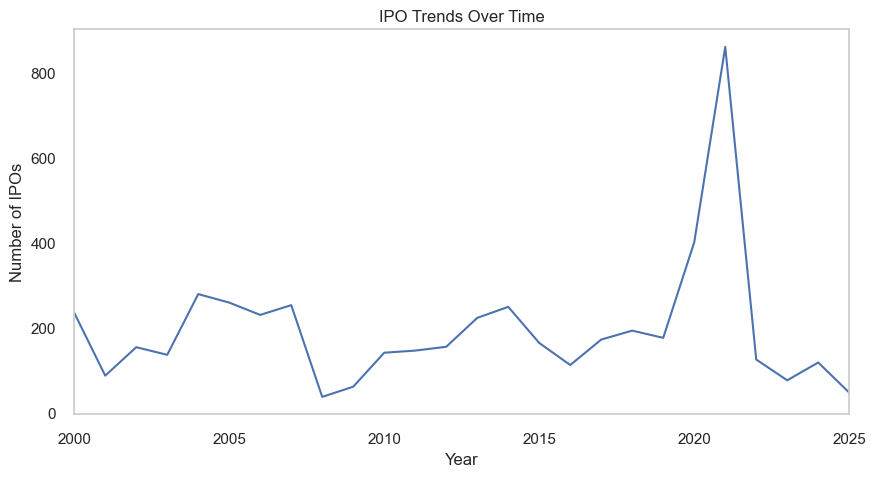

In [65]:
def number_of_ipos_over_time(df):
    df_tmp = df.copy()
    df_tmp['Trade Date (US)'] = pd.to_datetime(df_tmp['Trade Date (US)'], errors='coerce')
    df_tmp.set_index('Trade Date (US)', inplace=True)
    df_tmp['IPO Count'] = 1
    ipo_trend = df_tmp.resample('YE')['IPO Count'].sum()

    plt.figure(figsize=(10, 5))
    ipo_trend.plot()
    plt.xlabel('Year')
    plt.ylabel('Number of IPOs')
    plt.title('IPO Trends Over Time')
    plt.grid(False)
    plt.show()

number_of_ipos_over_time(df)

### Industry Sector Distribution

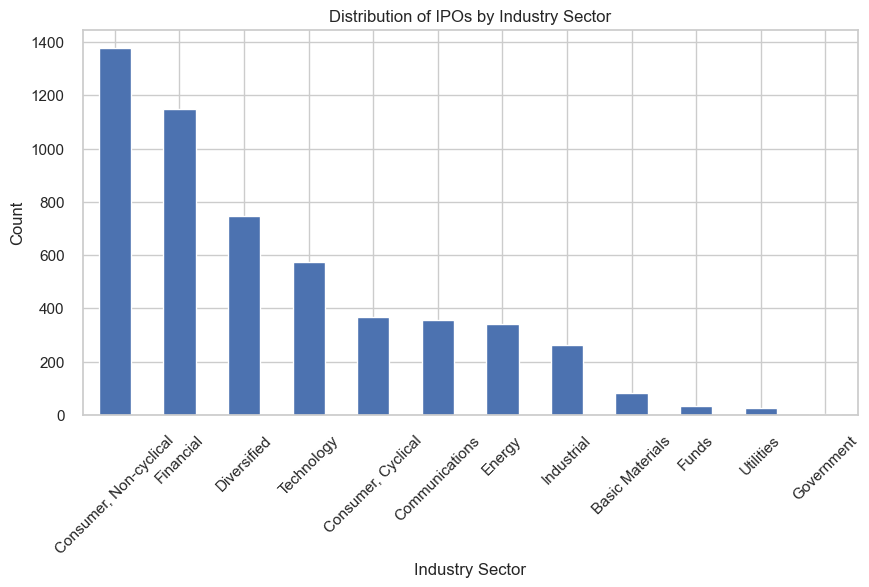

In [66]:
def industry_sector_distribution(df):
    plt.figure(figsize=(10, 5))
    df['Industry Sector'].value_counts().plot(kind='bar')
    plt.xlabel('Industry Sector')
    plt.ylabel('Count')
    plt.title('Distribution of IPOs by Industry Sector')
    plt.xticks(rotation=45)
    plt.show()

industry_sector_distribution(df)

### Correlation Matrix

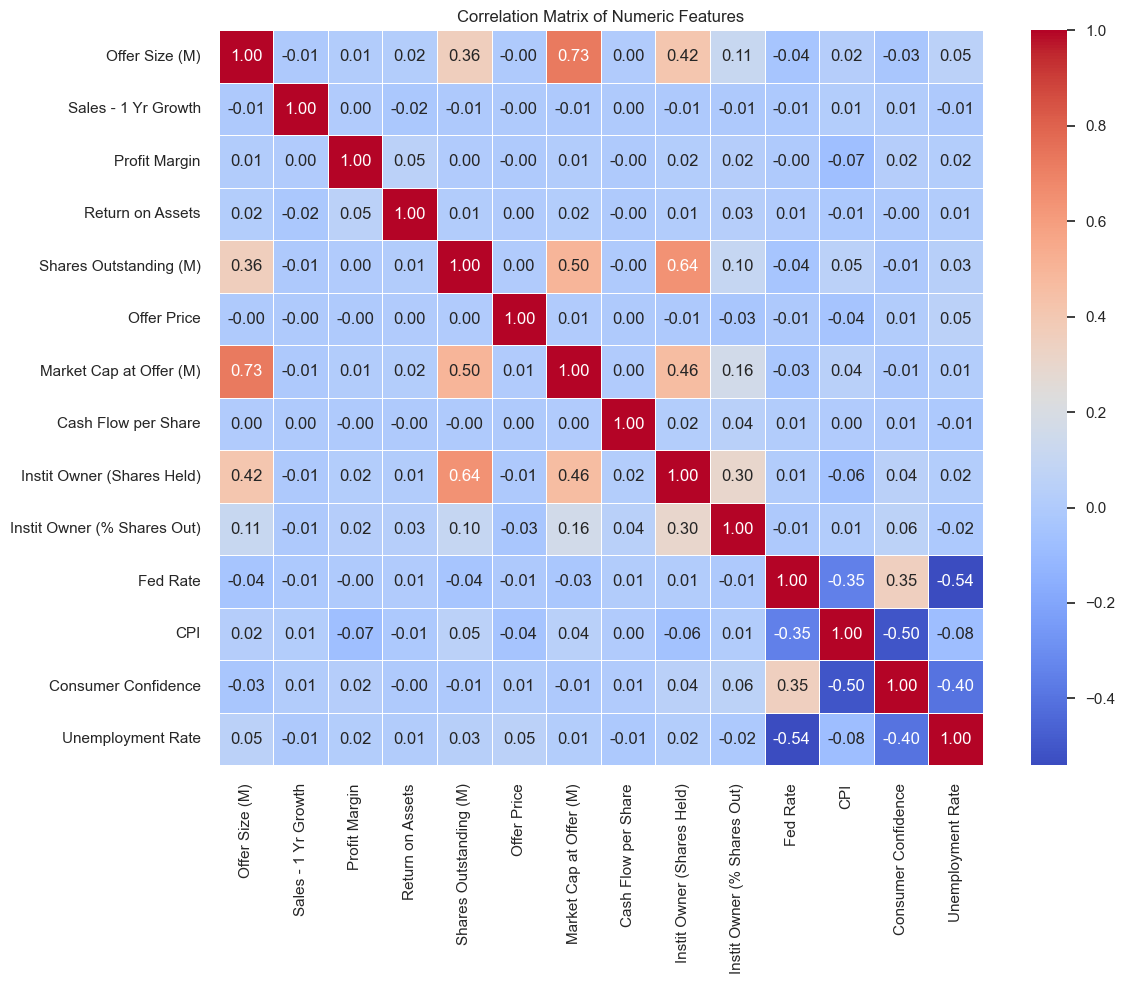

In [67]:
def correlation_matrix(df):
    """Perform comprehensive correlation analysis"""
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols[numeric_cols != 'Offer To 1st Close']
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', 
                fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

correlation_matrix(df)

### Offer To 1st Close Distribution

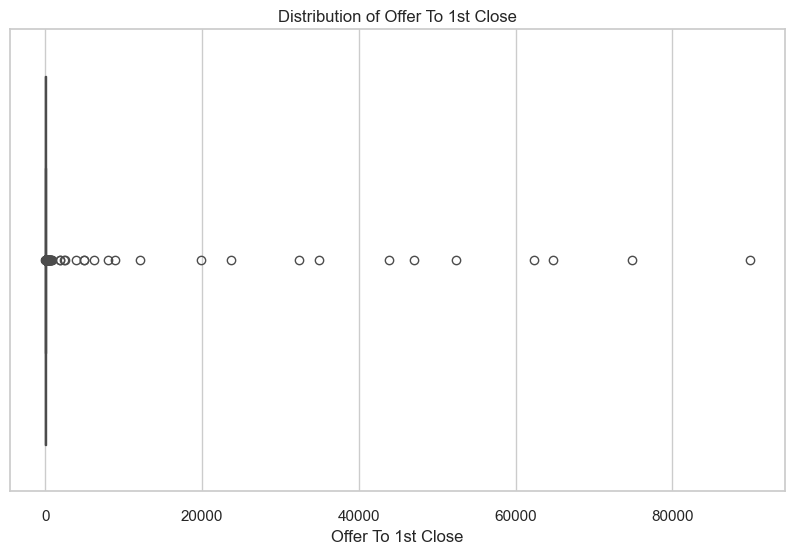

In [68]:
def offer_to_1st_close_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Offer To 1st Close'].dropna())
    plt.xlabel('Offer To 1st Close')
    plt.title('Distribution of Offer To 1st Close')
    plt.show()

offer_to_1st_close_distribution(df)

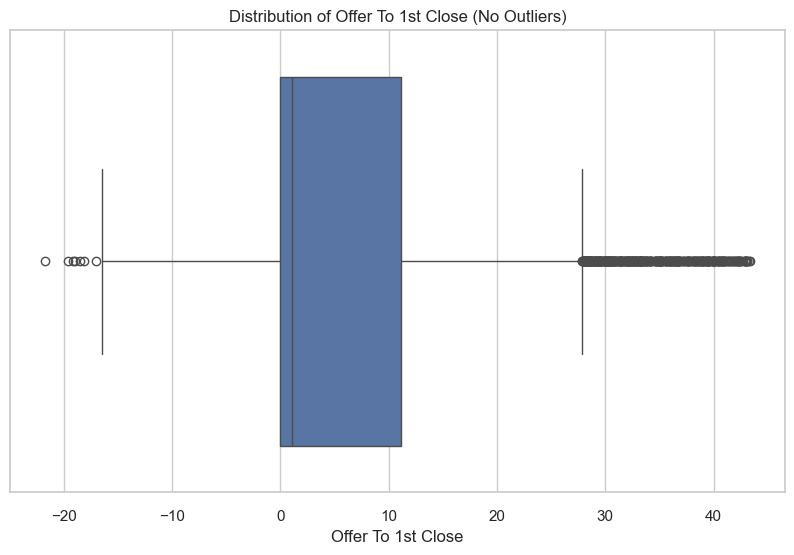

In [69]:
def offer_to_1st_close_distribution_no_outliers(df):
    IQR = df['Offer To 1st Close'].quantile(0.75) - df['Offer To 1st Close'].quantile(0.25)
    lower_bound = df['Offer To 1st Close'].quantile(0.25) - 1.5 * IQR
    upper_bound = df['Offer To 1st Close'].quantile(0.75) + 1.5 * IQR
    df_no_outliers = df[(df['Offer To 1st Close'] > lower_bound) & (df['Offer To 1st Close'] < upper_bound)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers['Offer To 1st Close'].dropna())
    plt.xlabel('Offer To 1st Close')
    plt.title('Distribution of Offer To 1st Close (No Outliers)')
    plt.show()

offer_to_1st_close_distribution_no_outliers(df)

### Offer To 1st Close Distribution by Industry

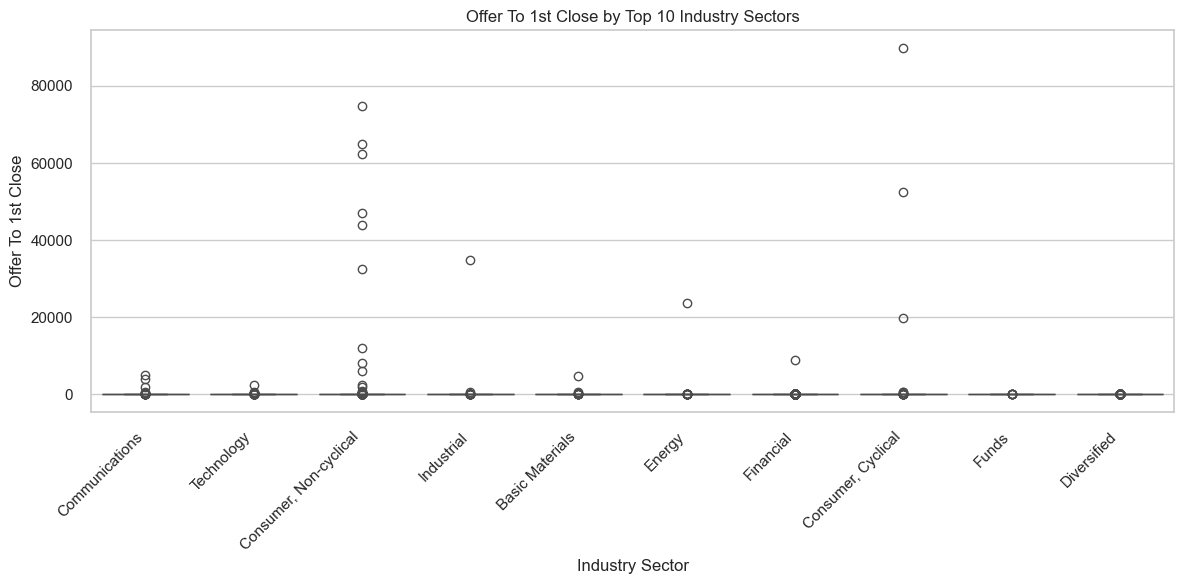

In [70]:
def analyze_target_variable(df):
    """Analyze the target variable (Offer To 1st Close)"""
    plt.figure(figsize=(12, 6))
    top_sectors = df['Industry Sector'].value_counts().head(10).index
    df_top_sectors = df[df['Industry Sector'].isin(top_sectors)].copy()
    
    df_top_sectors = df_top_sectors.reset_index(drop=True)
    ax = sns.boxplot(x='Industry Sector', y='Offer To 1st Close', data=df_top_sectors)
    plt.xticks(rotation=45, ha='right')
    plt.title('Offer To 1st Close by Top 10 Industry Sectors')
    plt.tight_layout()
    plt.show()


analyze_target_variable(df)

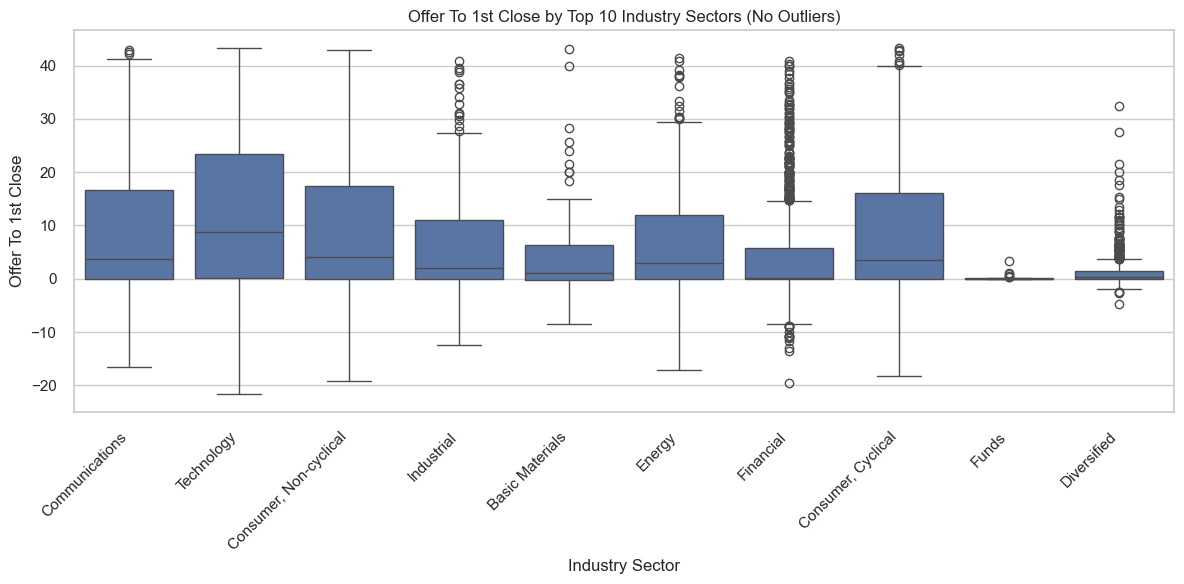

In [71]:
def analyze_target_variable_no_outliers(df):
    """Analyze the target variable (Offer To 1st Close)"""
    plt.figure(figsize=(12, 6))
    IQR = df['Offer To 1st Close'].quantile(0.75) - df['Offer To 1st Close'].quantile(0.25)
    lower_bound = df['Offer To 1st Close'].quantile(0.25) - 1.5 * IQR
    upper_bound = df['Offer To 1st Close'].quantile(0.75) + 1.5 * IQR
    df_no_outliers = df[(df['Offer To 1st Close'] > lower_bound) & (df['Offer To 1st Close'] < upper_bound)]
    top_sectors = df_no_outliers['Industry Sector'].value_counts().head(10).index
    df_top_sectors = df_no_outliers[df_no_outliers['Industry Sector'].isin(top_sectors)].copy()
    
    df_top_sectors = df_top_sectors.reset_index(drop=True)
    ax = sns.boxplot(x='Industry Sector', y='Offer To 1st Close', data=df_top_sectors)
    plt.xticks(rotation=45, ha='right')
    plt.title('Offer To 1st Close by Top 10 Industry Sectors (No Outliers)')
    plt.tight_layout()
    plt.show()


analyze_target_variable_no_outliers(df)